In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

# classification : logesticregression

In [2]:
training= pd.read_csv('minoo/Train_Titanic.csv')

In [37]:
training.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [38]:
training.tail(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
881,882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,NaN,S
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.7500,NaN,Q


In [81]:
survived = training[training['Survived']==1]
survived

,Survived,Pclass,Age,SibSp,Parch,Fare,male
1,1,1,38.0,1,0,71.2833,0
2,1,3,26.0,0,0,7.9250,0
3,1,1,35.0,1,0,53.1000,0
8,1,3,27.0,0,2,11.1333,0
9,1,2,14.0,1,0,30.0708,0
...,...,...,...,...,...,...,...
875,1,3,15.0,0,0,7.2250,0
879,1,1,56.0,0,1,83.1583,0
880,1,2,25.0,0,1,26.0000,0
887,1,1,19.0,0,0,30.0000,0


In [82]:
nosurvived= training[training['Survived']==0]

In [83]:
print('total =' , len(training))
print('people who are alive =' ,len(survived) )
print('people who are die =' ,len(nosurvived) )

total = 891
people who are alive = 342
people who are die = 549


In [84]:
print('% survived =' , len(survived)/len(training) *100)
print('%did not survive =' , len(nosurvived)/len(training) *100)

% survived = 38.38383838383838
%did not survive = 61.61616161616161


<AxesSubplot:xlabel='Pclass', ylabel='count'>

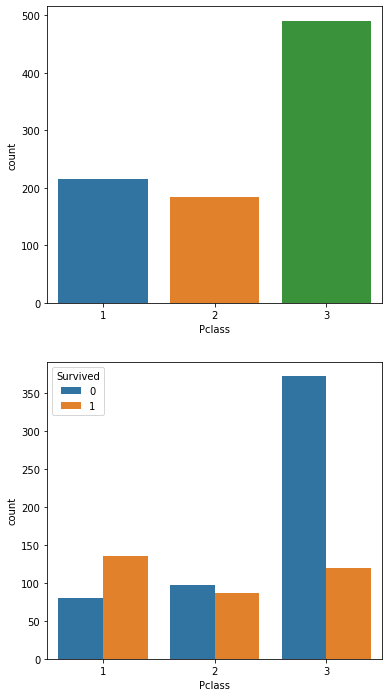

In [43]:
plt.figure(figsize=[6,12])
plt.subplot(211)
sns.countplot(x='Pclass' , data=training)
plt.subplot(212)
sns.countplot(x='Pclass' ,hue='Survived', data=training)

<AxesSubplot:xlabel='Age', ylabel='count'>

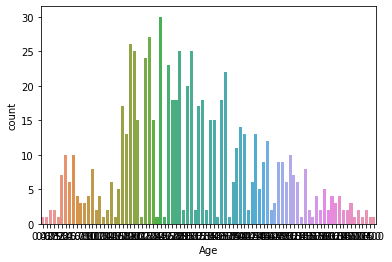

In [44]:
sns.countplot(x='Age' , data=training)

<AxesSubplot:xlabel='Sex', ylabel='count'>

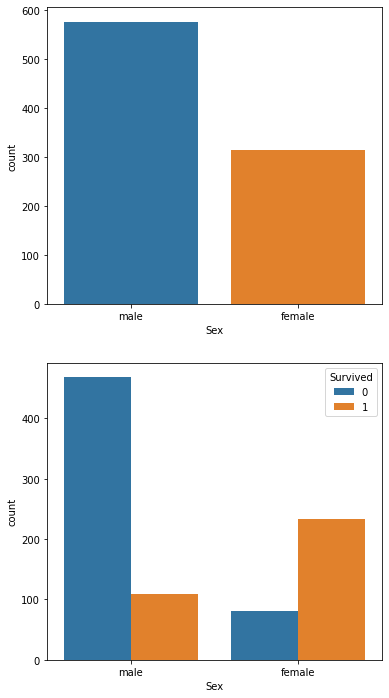

In [45]:
plt.figure(figsize=[6,12])
plt.subplot(211)
sns.countplot(x='Sex' , data=training)
plt.subplot(212)
sns.countplot(x='Sex' ,hue='Survived', data=training)

<AxesSubplot:xlabel='Age', ylabel='count'>

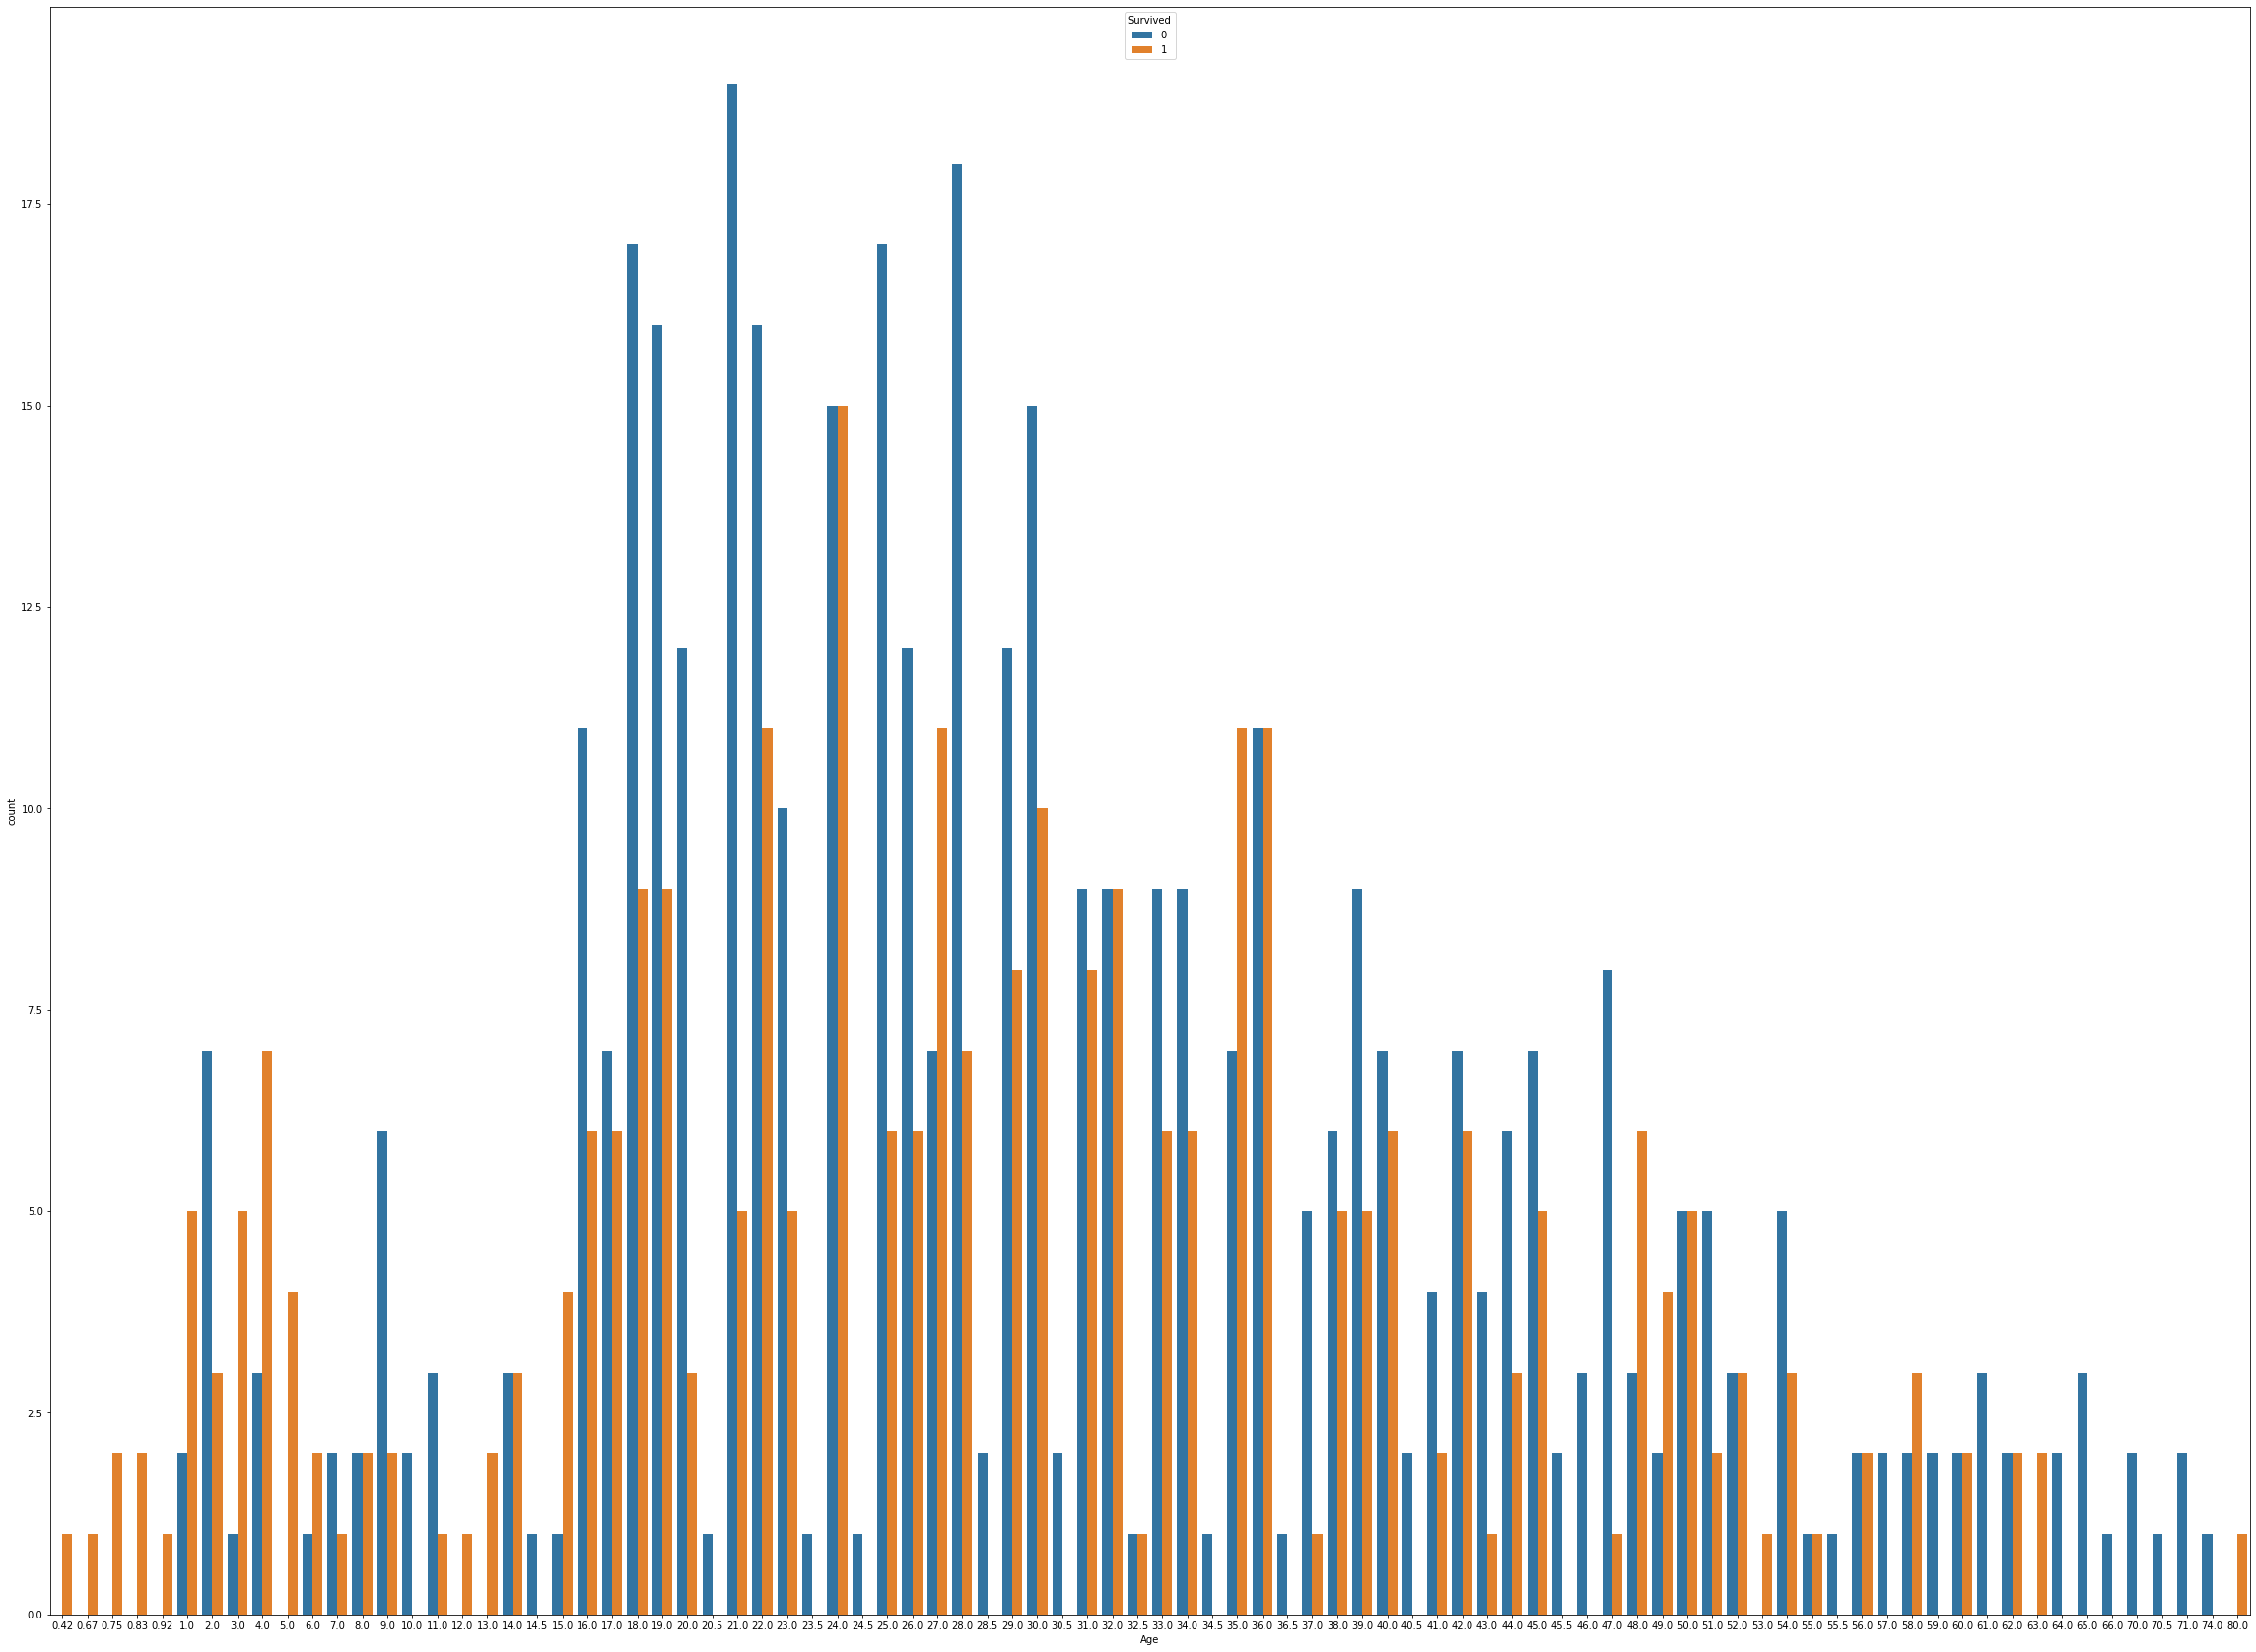

In [46]:
plt.figure(figsize=[40,30])
sns.countplot(x='Age' ,hue='Survived', data=training)

<AxesSubplot:>

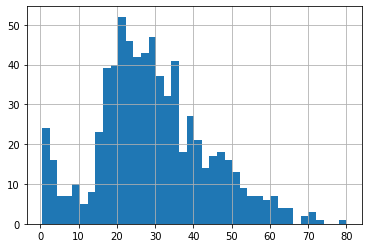

In [47]:
training['Age'].hist(bins=40)

<AxesSubplot:>

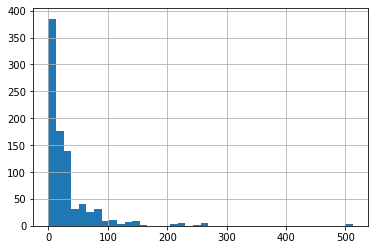

In [48]:
training['Fare'].hist(bins=40)

<AxesSubplot:>

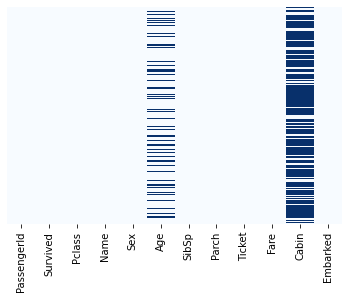

In [49]:
# برای پیدا کردن اطلاعات ناقص در داده ها :    missing information

sns.heatmap(training.isnull() , yticklabels=False ,cbar=False ,cmap='Blues')

In [50]:
training

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
training.drop('Cabin' , axis=1 , inplace=True)

In [52]:
training

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [3]:
training.drop(['Name' , 'Ticket' , 'Embarked'] ,axis=1 ,inplace=True)

In [6]:
training

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,male,22.0,1,0,7.2500
1,2,1,1,female,38.0,1,0,71.2833
2,3,1,3,female,26.0,0,0,7.9250
3,4,1,1,female,35.0,1,0,53.1000
4,5,0,3,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000
887,888,1,1,female,19.0,0,0,30.0000
888,889,0,3,female,NaN,1,2,23.4500
889,890,1,1,male,26.0,0,0,30.0000


<AxesSubplot:>

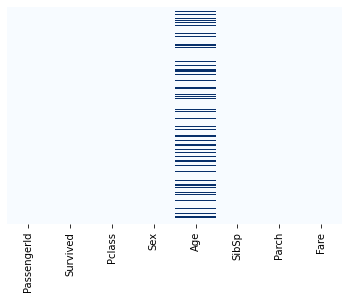

In [57]:
sns.heatmap(training.isnull() , yticklabels=False ,cbar=False ,cmap='Blues')

<AxesSubplot:xlabel='Sex', ylabel='Age'>

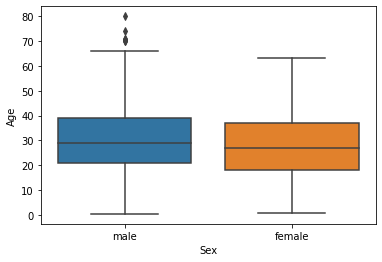

In [58]:
sns.boxplot(x='Sex' , y='Age' , data=training)

In [7]:
#fill the missing data:
def fii_age (data):
    age=data[0]
    sex=data[1]
    
    if pd.isnull(age):
        if sex is 'male':
            return 29
        else:
            return 25
    else:
        return age

<>:7: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:7: SyntaxWarning: "is" with a literal. Did you mean "=="?
<ipython-input-7-ddf23c158694>:7: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if sex is 'male':


In [8]:
training['Age']= training[['Age', 'Sex'] ].apply(fii_age ,axis=1)

<AxesSubplot:>

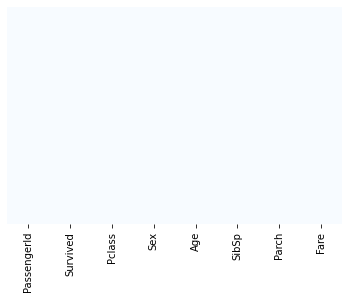

In [9]:
sns.heatmap(training.isnull() , yticklabels=False ,cbar=False ,cmap='Blues')

In [27]:
training

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500
...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000
887,1,1,19.0,0,0,30.0000
888,0,3,25.0,1,2,23.4500
889,1,1,26.0,0,0,30.0000


<AxesSubplot:>

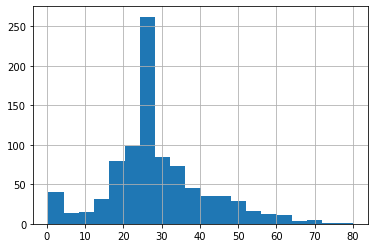

In [10]:
training['Age'].hist(bins=20)

In [14]:
training.drop('PassengerId'  ,axis=1 ,inplace=True)

In [26]:
training

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500
...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000
887,1,1,19.0,0,0,30.0000
888,0,3,25.0,1,2,23.4500
889,1,1,26.0,0,0,30.0000


In [16]:
# translate male and female to 0 and 1
male= pd.get_dummies(training['Sex'])

In [17]:
male

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


In [19]:
# create just one column
male= pd.get_dummies(training['Sex'] , drop_first = True)

In [20]:
male

,male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [30]:
# training= pd.concat([training , male] , axis=1)
training['male']=male

In [29]:
training

,Survived,Pclass,Age,SibSp,Parch,Fare,male
0,0,3,22.0,1,0,7.2500,1
1,1,1,38.0,1,0,71.2833,0
2,1,3,26.0,0,0,7.9250,0
3,1,1,35.0,1,0,53.1000,0
4,0,3,35.0,0,0,8.0500,1
...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,1
887,1,1,19.0,0,0,30.0000,0
888,0,3,25.0,1,2,23.4500,0
889,1,1,26.0,0,0,30.0000,1


In [65]:
# survie is our target class so we drop it
x=training.drop('Survived' ,axis=1).values

In [66]:
x

array([[ 3.    , 22.    ,  1.    ,  0.    ,  7.25  ,  1.    ],
       [ 1.    , 38.    ,  1.    ,  0.    , 71.2833,  0.    ],
       [ 3.    , 26.    ,  0.    ,  0.    ,  7.925 ,  0.    ],
       ...,
       [ 3.    , 25.    ,  1.    ,  2.    , 23.45  ,  0.    ],
       [ 1.    , 26.    ,  0.    ,  0.    , 30.    ,  1.    ],
       [ 3.    , 32.    ,  0.    ,  0.    ,  7.75  ,  1.    ]])

In [67]:
# target
# y=training.drop(['Pclass' , 'Age' ,'SibSp' ,'Parch' , 'Fare' , 'male'] , axis=1).values
y=training['Survived'].values

In [68]:
y

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,

In [69]:
from sklearn.model_selection import train_test_split

In [70]:
x_train , x_test , y_train , y_test = train_test_split(x, y, test_size=0.2 , random_state=0)

In [71]:
from sklearn.linear_model import LogisticRegression
classifier= LogisticRegression(random_state=0)
classifier.fit(x_train , y_train)

LogisticRegression(random_state=0)

In [72]:
# testing our data
y_predict = classifier.predict(x_test)

In [73]:
y_predict

array([0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0], dtype=int64)

<AxesSubplot:>

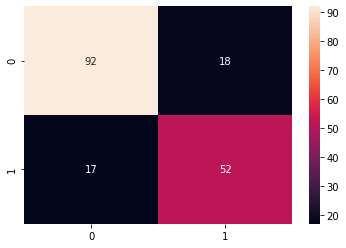

In [85]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test , y_predict)
sns.heatmap( cm ,  annot =True )

In [78]:
from sklearn.metrics import classification_report
print(classification_report(y_test , y_predict))

              precision    recall  f1-score   support

           0       0.84      0.84      0.84       110
           1       0.74      0.75      0.75        69

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.81      0.80      0.80       179



# support vector machine

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
from sklearn.datasets import load_breast_cancer

In [6]:
cancer = load_breast_cancer()

In [7]:
cancer

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [8]:
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [9]:
print(cancer['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [10]:
print(cancer['target_names'])

['malignant' 'benign']


In [11]:
print(cancer['feature_names'])

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [12]:
print(cancer['target'])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 0 1 1 0 

In [13]:
cancer['data'].shape

(569, 30)

In [14]:
cancer_df = pd.DataFrame( np.c_[cancer['data'] , cancer['target']] , columns = np.append(cancer['feature_names'] ,'target' ))

In [15]:
cancer_df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0.0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0.0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0.0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0.0


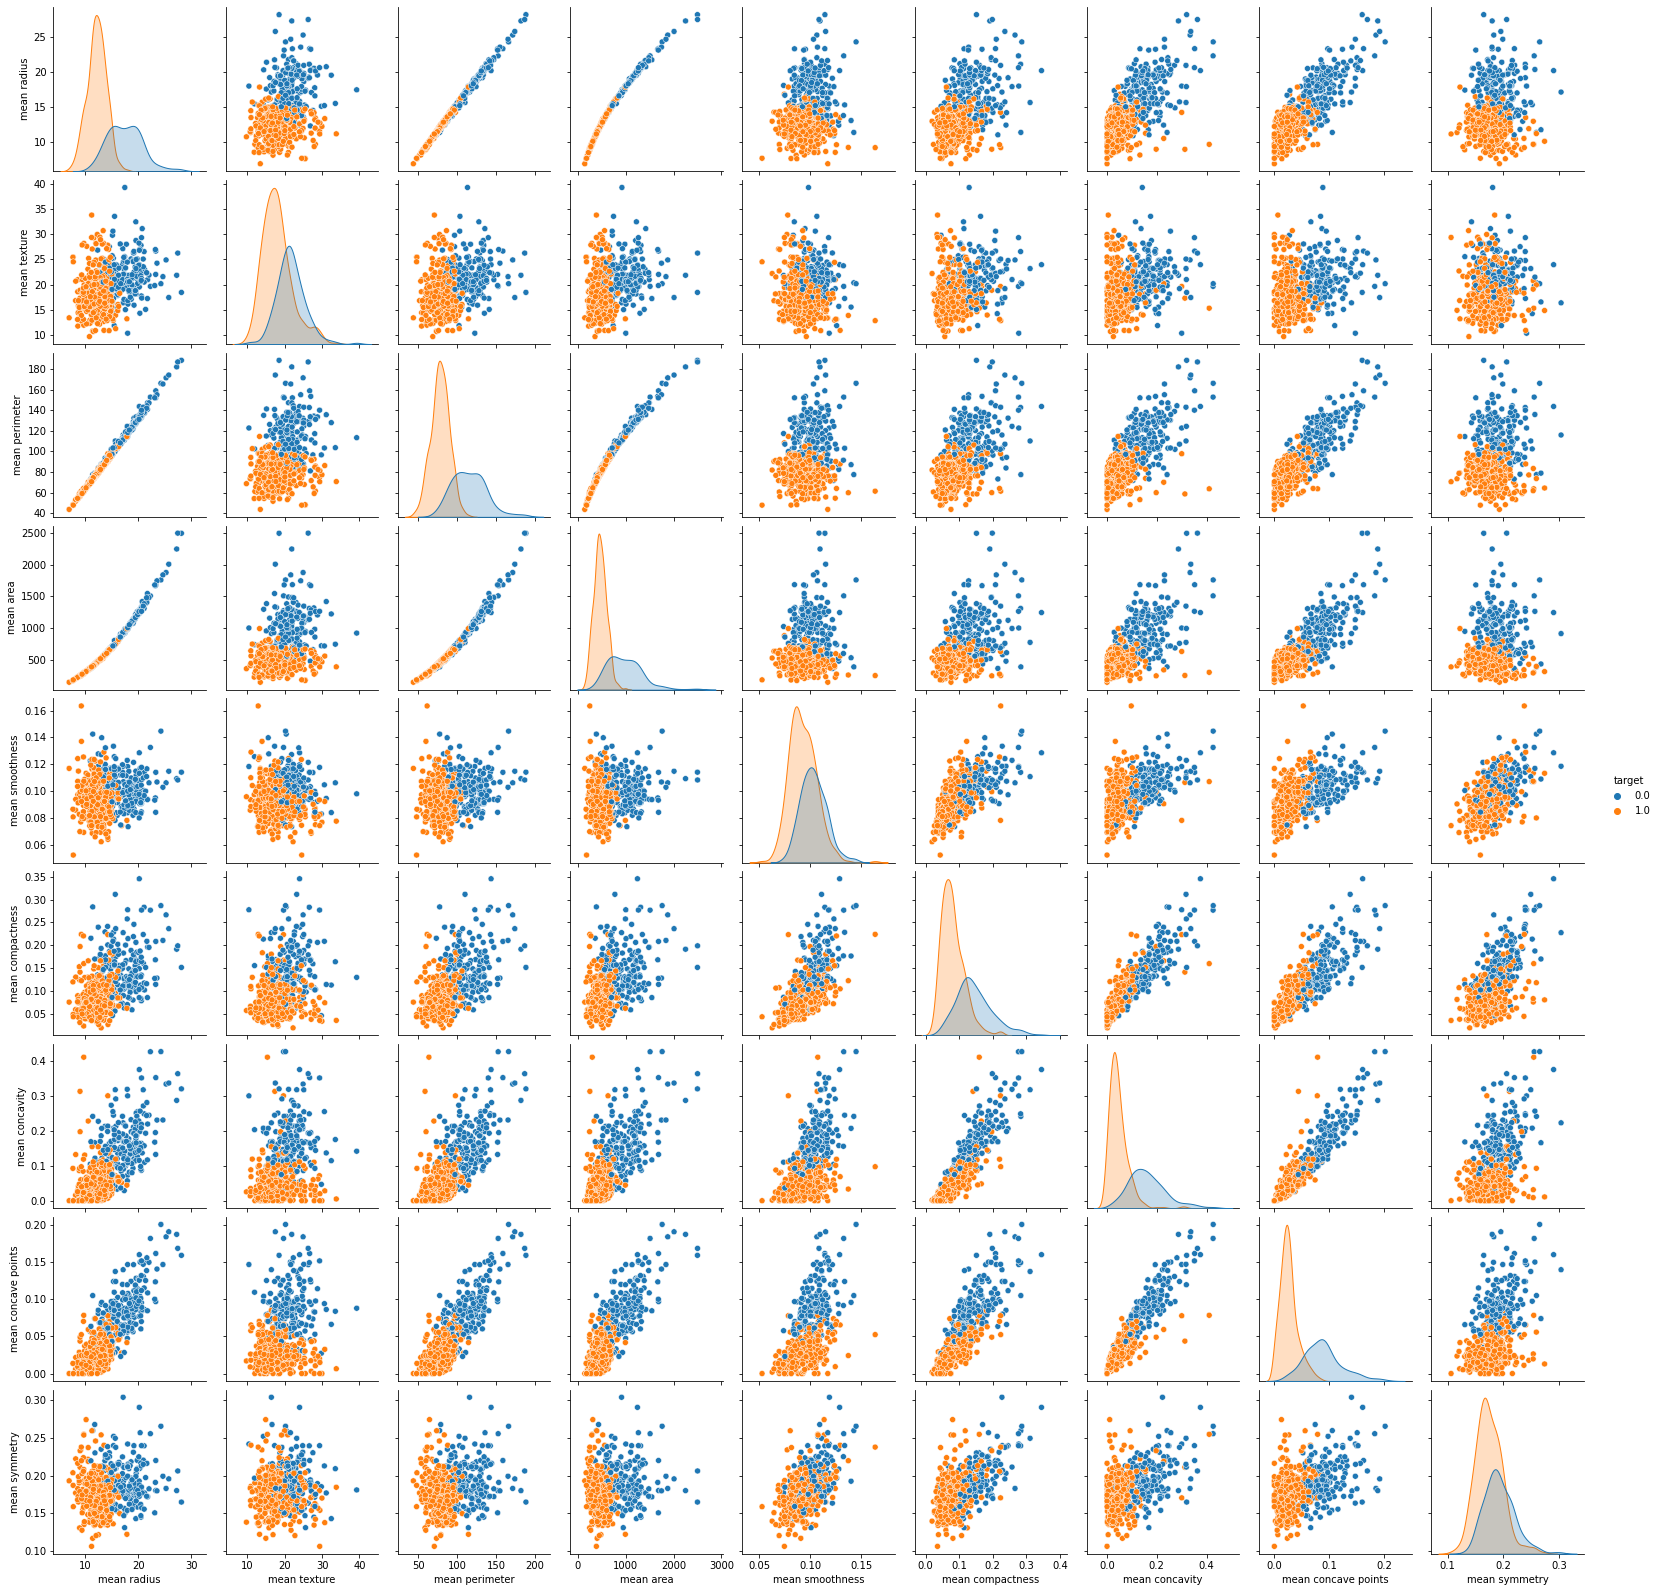

In [17]:
sns.pairplot(cancer_df , hue= 'target' ,vars =['mean radius' , 'mean texture' , 'mean perimeter' ,'mean area' , 'mean smoothness' ,'mean compactness','mean concavity','mean concave points','mean symmetry'])

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='target', ylabel='count'>

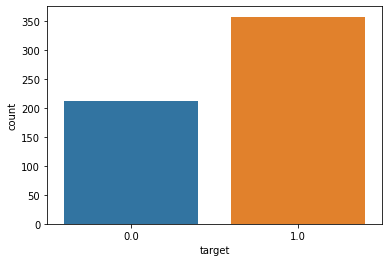

In [18]:
sns.countplot(cancer_df['target'] , label='count')

<AxesSubplot:xlabel='mean radius', ylabel='mean texture'>

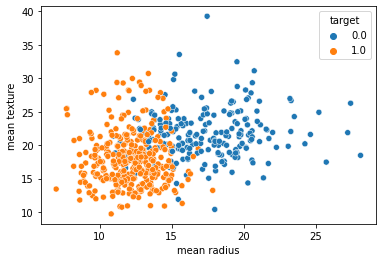

In [19]:
sns.scatterplot(x='mean radius' , y='mean texture' , hue='target' , data= cancer_df)

<AxesSubplot:>

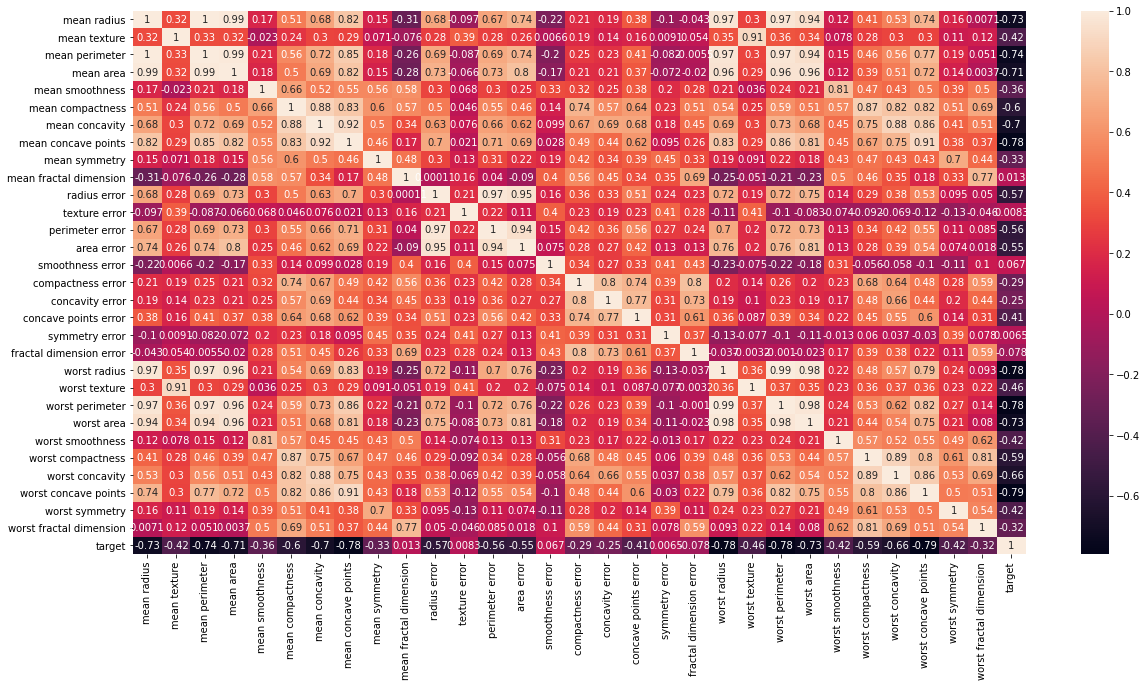

In [20]:
plt.figure(figsize=(20,10))
sns.heatmap(cancer_df.corr(), annot=True)

<AxesSubplot:xlabel='mean area', ylabel='mean perimeter'>

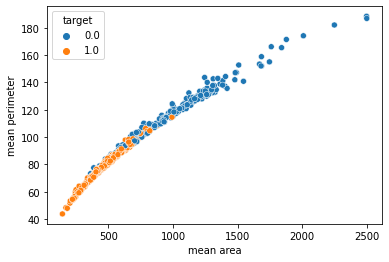

In [21]:
# good
sns.scatterplot(x='mean area' , y='mean perimeter' , hue='target' , data= cancer_df)

<AxesSubplot:xlabel='worst area', ylabel='mean fractal dimension'>

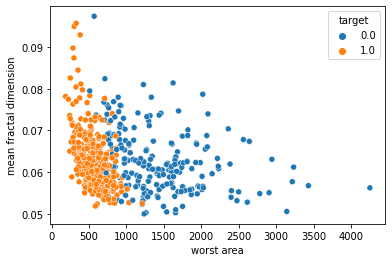

In [22]:
# bad
sns.scatterplot(x='worst area' , y='mean fractal dimension' , hue='target' , data= cancer_df)

In [23]:
cancer_df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0.0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0.0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0.0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0.0


In [24]:
x= cancer_df.drop(['target'] , axis=1)
x

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [26]:
y= cancer_df['target']
y

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
564    0.0
565    0.0
566    0.0
567    0.0
568    1.0
Name: target, Length: 569, dtype: float64

In [25]:
from sklearn.model_selection import train_test_split

In [28]:
x_train , x_test , y_train , y_test = train_test_split(x, y, test_size=0.25 )

In [29]:
x_train.shape

(426, 30)

In [30]:
x_test.shape

(143, 30)

In [31]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report ,confusion_matrix

In [32]:
svc_model=SVC()

In [33]:
svc_model.fit(x_train , y_train)

SVC()

In [34]:
y_predict=svc_model.predict(x_test ,)

In [35]:
y_predict

array([1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1.,
       1., 1., 0., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 0., 0., 1., 0.,
       1., 0., 1., 1., 1., 0., 0., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1.,
       1., 1., 0., 1., 0., 0., 1., 1., 1., 1., 0., 1., 1., 0., 0., 1., 0.,
       1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       1., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 1., 0.,
       0., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 0.,
       1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 0., 0., 1., 1., 1.,
       1., 1., 0., 0., 1., 1., 1.])

In [36]:
cm =confusion_matrix(y_test , y_predict )

<AxesSubplot:>

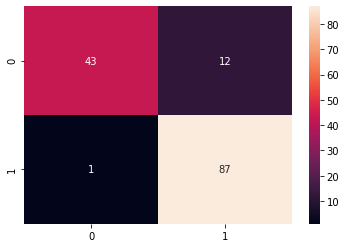

In [37]:
sns.heatmap(cm ,annot=True)

In [38]:
print(classification_report(y_test , y_predict))

              precision    recall  f1-score   support

         0.0       0.98      0.78      0.87        55
         1.0       0.88      0.99      0.93        88

    accuracy                           0.91       143
   macro avg       0.93      0.89      0.90       143
weighted avg       0.92      0.91      0.91       143



## improve the model

In [88]:
min_train= x_train.min()

In [89]:
min_train

mean radius                  6.981000
mean texture                 9.710000
mean perimeter              43.790000
mean area                  143.500000
mean smoothness              0.062510
mean compactness             0.019380
mean concavity               0.000000
mean concave points          0.000000
mean symmetry                0.106000
mean fractal dimension       0.050240
radius error                 0.111500
texture error                0.360200
perimeter error              0.757000
area error                   6.802000
smoothness error             0.001713
compactness error            0.002252
concavity error              0.000000
concave points error         0.000000
symmetry error               0.007882
fractal dimension error      0.000895
worst radius                 7.930000
worst texture               12.020000
worst perimeter             50.410000
worst area                 185.200000
worst smoothness             0.071170
worst compactness            0.027290
worst concav

In [90]:
range_train = (x_train -min_train ).max()

In [91]:
range_train

mean radius                  21.129000
mean texture                 29.570000
mean perimeter              144.710000
mean area                  2357.500000
mean smoothness               0.082190
mean compactness              0.326020
mean concavity                0.426800
mean concave points           0.201200
mean symmetry                 0.198000
mean fractal dimension        0.045510
radius error                  2.761500
texture error                 4.524800
perimeter error              21.223000
area error                  535.398000
smoothness error              0.029417
compactness error             0.133148
concavity error               0.396000
concave points error          0.052790
symmetry error                0.071068
fractal dimension error       0.028945
worst radius                 28.110000
worst texture                37.520000
worst perimeter             200.790000
worst area                 4068.800000
worst smoothness              0.147230
worst compactness        

In [114]:
x_train_scaled= (x_train -min_train )/ range_train

In [93]:
x_train_scaled

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
460,0.477969,0.589787,0.465828,0.333998,0.443728,0.281026,0.235942,0.319632,0.370202,0.276203,...,0.534685,0.598881,0.506450,0.359516,0.603342,0.210641,0.210783,0.534364,0.361883,0.233242
210,0.643618,0.420358,0.628222,0.486320,0.345419,0.354027,0.384255,0.475199,0.356061,0.000000,...,0.544646,0.421642,0.537328,0.361483,0.316715,0.256823,0.308387,0.659794,0.336589,0.023678
283,0.438213,0.306392,0.449243,0.280636,0.536440,0.493283,0.456420,0.449901,0.412121,0.364755,...,0.377801,0.348348,0.380945,0.207875,0.443728,0.430102,0.401438,0.595189,0.301778,0.336219
426,0.165602,0.178221,0.163776,0.080636,0.433751,0.251273,0.148430,0.110239,0.436869,0.415513,...,0.149413,0.254531,0.154390,0.062721,0.417918,0.264197,0.234744,0.319931,0.364388,0.271678
119,0.519144,0.348326,0.486559,0.355673,0.261711,0.146739,0.170876,0.278131,0.539899,0.000220,...,0.450018,0.421375,0.392400,0.264402,0.244719,0.090142,0.179633,0.407216,0.830704,0.039814
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13,0.419755,0.481569,0.414000,0.271135,0.261589,0.247899,0.232849,0.266600,0.397475,0.068996,...,0.316969,0.416844,0.306738,0.169903,0.284793,0.160191,0.185463,0.384536,0.311545,0.051358
446,0.509679,0.619547,0.507981,0.355504,0.455773,0.343599,0.397844,0.412177,0.329798,0.196001,...,0.483814,0.706823,0.473081,0.307658,0.468179,0.338514,0.511102,0.676976,0.352367,0.234225
441,0.486961,0.531282,0.474121,0.333107,0.253072,0.280719,0.282099,0.285089,0.205556,0.084157,...,0.442903,0.624733,0.410329,0.270055,0.491951,0.373442,0.402236,0.597595,0.234160,0.160042
255,0.330304,0.248225,0.329210,0.194655,0.572941,0.332863,0.229358,0.260736,0.428283,0.243024,...,0.300961,0.267857,0.287315,0.157491,0.543571,0.290004,0.256310,0.472165,0.376409,0.160895


<AxesSubplot:xlabel='mean area', ylabel='mean smoothness'>

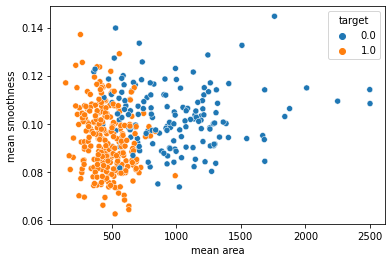

In [94]:
sns.scatterplot(x=x_train['mean area'] , y=x_train['mean smoothness'] , hue=y_train )

<AxesSubplot:xlabel='mean area', ylabel='mean smoothness'>

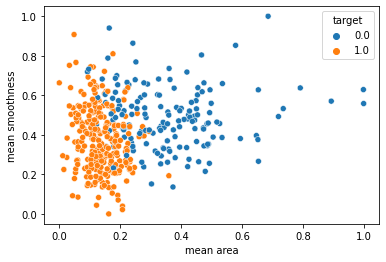

In [95]:
sns.scatterplot(x=x_train_scaled['mean area'] , y=x_train_scaled['mean smoothness'] , hue=y_train )

In [96]:
min_test=x_test.min()

In [97]:
range_test=(x_test - min_test).max()

In [98]:
x_test_scaled=(x_test - min_test)/range_test

In [99]:
x_test_scaled

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
386,0.282540,0.118986,0.287927,0.179438,0.256838,0.177057,0.194622,0.166711,0.248361,0.243892,...,0.166523,0.123033,0.188191,0.085319,0.110188,0.234040,0.262906,0.344906,0.205576,0.266972
66,0.108254,0.476979,0.113734,0.056450,0.467365,0.175056,0.061810,0.098947,0.300073,0.400800,...,0.049423,0.509125,0.055705,0.022535,0.497256,0.140042,0.080444,0.245925,0.245888,0.300441
142,0.233016,0.285566,0.240157,0.138570,0.510698,0.243598,0.057797,0.122434,0.247633,0.329823,...,0.151455,0.358087,0.156130,0.076841,0.397153,0.155729,0.065880,0.241585,0.186923,0.204013
486,0.436825,0.261769,0.431890,0.309706,0.304956,0.132042,0.147752,0.183618,0.075747,0.075611,...,0.309885,0.316551,0.306091,0.180219,0.196203,0.189799,0.208291,0.295396,0.161051,0.074289
214,0.408254,0.621831,0.419388,0.274393,0.379164,0.386604,0.317302,0.425132,0.677349,0.302654,...,0.327105,0.612649,0.363917,0.174010,0.505413,0.433558,0.320000,0.668679,0.616125,0.391161
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33,0.730794,0.759441,0.746221,0.626437,0.373567,0.551857,0.471542,0.499539,0.399126,0.266428,...,0.640951,0.488357,0.662041,0.489725,0.468338,0.743741,0.520598,0.673585,0.405134,0.475050
263,0.498413,0.392654,0.485912,0.368838,0.232644,0.088748,0.119778,0.187303,0.176256,0.094145,...,0.372309,0.512587,0.369699,0.229892,0.153196,0.157567,0.193162,0.323321,0.206779,0.094439
104,0.173333,0.387998,0.181844,0.099042,0.426650,0.207266,0.085231,0.079013,0.664239,0.312763,...,0.098071,0.249528,0.101902,0.045260,0.253300,0.118227,0.068265,0.120868,0.235459,0.156966
440,0.203810,0.279876,0.222150,0.121648,0.329692,0.309379,0.269124,0.237697,0.134013,0.346251,...,0.133374,0.361548,0.204189,0.068457,0.380839,0.436376,0.408462,0.586792,0.178099,0.328202


In [100]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report ,confusion_matrix
svc_model=SVC()

In [101]:
svc_model.fit(x_train , y_train)

SVC()

In [102]:
y_predict=svc_model.predict(x_test ,)

In [103]:
y_predict

array([1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1.,
       1., 1., 0., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 0., 0., 1., 0.,
       1., 0., 1., 1., 1., 0., 0., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1.,
       1., 1., 0., 1., 0., 0., 1., 1., 1., 1., 0., 1., 1., 0., 0., 1., 0.,
       1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       1., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 1., 0.,
       0., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 0.,
       1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 0., 0., 1., 1., 1.,
       1., 1., 0., 0., 1., 1., 1.])

In [104]:
cm =confusion_matrix(y_test , y_predict )

<AxesSubplot:>

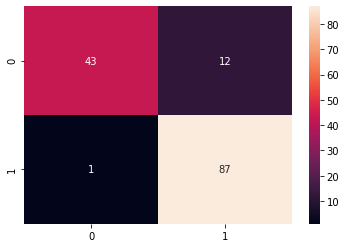

In [105]:
sns.heatmap(cm ,annot=True)

In [106]:
print(classification_report(y_test , y_predict))

              precision    recall  f1-score   support

         0.0       0.98      0.78      0.87        55
         1.0       0.88      0.99      0.93        88

    accuracy                           0.91       143
   macro avg       0.93      0.89      0.90       143
weighted avg       0.92      0.91      0.91       143



## improve part 2

In [118]:
param_grid = {'C': [0.1 , 1 ,10 ,100] , 'gamma':[1,0.1,0.01,0.001], 'kernel': ['rbf']}

In [119]:
from sklearn.model_selection import GridSearchCV

In [120]:
grid = GridSearchCV( SVC() , param_grid , refit=True , verbose =4)

In [121]:
grid.fit(x_train_scaled , y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.965 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.918 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.941 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.976 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.918 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.942 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.812 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.882 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.941 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.859 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.628 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf;

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf']},
             verbose=4)

In [122]:
grid.best_params_

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}

In [123]:
grid_predict=grid.predict(x_test_scaled)

In [124]:
cm= confusion_matrix(y_test , grid_predict)

<AxesSubplot:>

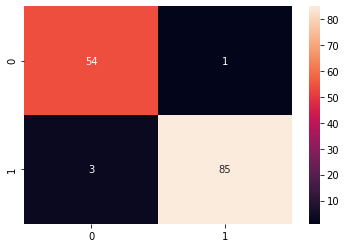

In [125]:
sns.heatmap(cm ,annot=True)

In [126]:
print(classification_report(y_test , grid_predict))

              precision    recall  f1-score   support

         0.0       0.95      0.98      0.96        55
         1.0       0.99      0.97      0.98        88

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143



# k_nearest neighbors

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
tshirt = pd.read_csv('minoo/Tshirt_Sizing_Dataset.csv')

In [4]:
tshirt.head(5)

,Height (in cms),Weight (in kgs),T Shirt Size
0,158,58,S
1,158,59,S
2,158,63,S
3,160,59,S
4,160,60,S


In [5]:
tshirt

,Height (in cms),Weight (in kgs),T Shirt Size
0,158,58,S
1,158,59,S
2,158,63,S
3,160,59,S
4,160,60,S
5,163,60,S
6,163,61,S
7,160,64,L
8,163,64,L
9,165,61,L


In [11]:
x=tshirt.iloc[:, 0:2].values
x

array([[158,  58],
       [158,  59],
       [158,  63],
       [160,  59],
       [160,  60],
       [163,  60],
       [163,  61],
       [160,  64],
       [163,  64],
       [165,  61],
       [165,  62],
       [165,  65],
       [168,  62],
       [168,  63],
       [168,  66],
       [170,  63],
       [170,  64],
       [170,  68]], dtype=int64)

In [19]:
y=tshirt.iloc[:, 2].values
y

array(['S', 'S', 'S', 'S', 'S', 'S', 'S', 'L', 'L', 'L', 'L', 'L', 'L',
       'L', 'L', 'L', 'L', 'L'], dtype=object)

In [22]:
from sklearn.preprocessing import LabelEncoder
label_y =LabelEncoder()
y =label_y.fit_transform(y)

In [23]:
y

array([1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [39]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x, y, test_size=0.25 ,random_state=5 )

In [40]:
x_train.shape

(13, 2)

In [41]:
x_test.shape

(5, 2)

In [42]:
from sklearn.neighbors import KNeighborsClassifier

In [43]:
classifier= KNeighborsClassifier(n_neighbors = 5 , metric= 'minkowski' , p=2)

In [44]:
classifier.fit(x_train ,y_train)

KNeighborsClassifier()

In [45]:
y_predict = classifier.predict(x_test)

In [46]:
y_predict

array([1, 1, 0, 1, 0])

In [47]:
y_test

array([1, 1, 0, 1, 0])

In [49]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test , y_predict)

<AxesSubplot:>

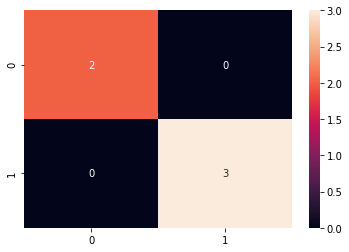

In [50]:
sns.heatmap(cm , annot=True)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


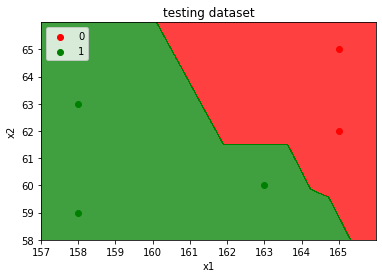

In [58]:
from matplotlib.colors import ListedColormap
x_grid , y_grid = x_test , y_test
x1,x2 = np.meshgrid(np.arange(start = x_grid[:,0].min()-1 , stop =x_grid[:, 0].max()+1 , step =0.01),
                   np.arange(start = x_grid[: ,1].min()-1 , stop= x_grid[:,1].max()+1 , step = 0.01))
plt.contourf(x1 ,x2 , classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),alpha =0.75 , cmap = ListedColormap(('red','green')))
plt.xlim(x1.min(),x1.max())
plt.ylim(x2.min() ,x2.max())
for i,j in enumerate(np.unique(y_grid)):
    plt.scatter(x_grid[y_grid==j , 0], x_grid[y_grid==j , 1],c = ListedColormap(('red','green'))(i), label = j)

plt.title('testing dataset')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.show()


# Decision Trees and random forest

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("minoo/amazon_alexa.tsv", sep='\t')
df

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1
...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1


In [4]:
df['verified_reviews']

0                                           Love my Echo!
1                                               Loved it!
2       Sometimes while playing a game, you can answer...
3       I have had a lot of fun with this thing. My 4 ...
4                                                   Music
                              ...                        
3145    Perfect for kids, adults and everyone in betwe...
3146    Listening to music, searching locations, check...
3147    I do love these things, i have them running my...
3148    Only complaint I have is that the sound qualit...
3149                                                 Good
Name: verified_reviews, Length: 3150, dtype: object

In [5]:
df['variation']

0       Charcoal Fabric 
1       Charcoal Fabric 
2         Walnut Finish 
3       Charcoal Fabric 
4       Charcoal Fabric 
              ...       
3145          Black  Dot
3146          Black  Dot
3147          Black  Dot
3148          White  Dot
3149          Black  Dot
Name: variation, Length: 3150, dtype: object

In [6]:
positive= df[  df['feedback']==1  ]
negetive= df[ df['feedback']==0  ]

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='feedback', ylabel='count'>

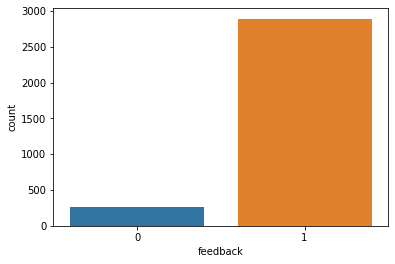

In [7]:
sns.countplot( df['feedback'] , label="count")

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='rating', ylabel='count'>

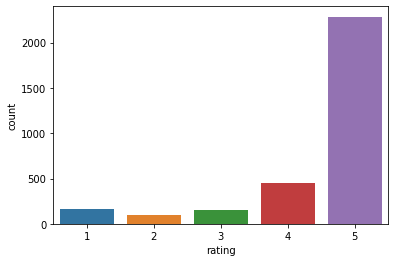

In [8]:
sns.countplot( df['rating'] , label="count")

<AxesSubplot:>

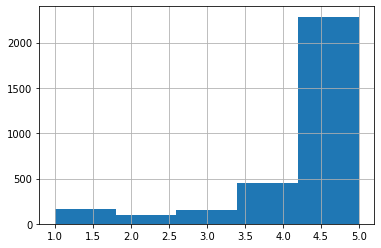

In [9]:
df['rating'].hist(bins=5)

<AxesSubplot:xlabel='variation', ylabel='rating'>

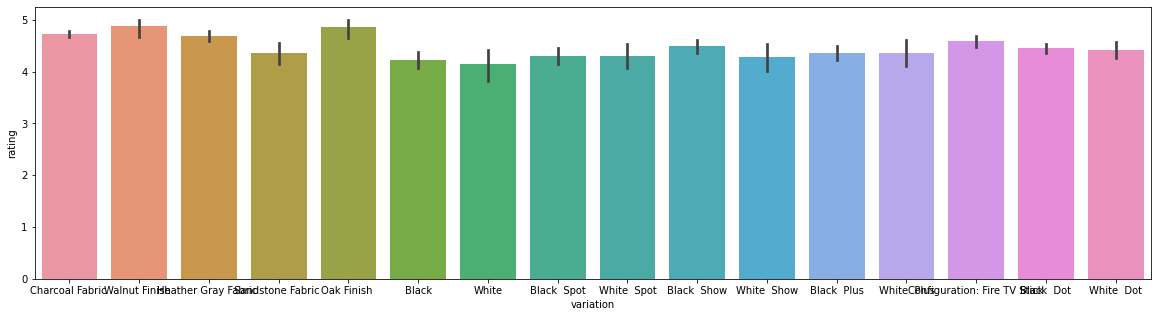

In [14]:
plt.figure(figsize=(20,5))
sns.barplot(x='variation' ,y='rating' , data=df)

In [15]:
 df= df.drop(['rating' , 'date'] , axis=1)

In [16]:
df

,variation,verified_reviews,feedback
0,Charcoal Fabric,Love my Echo!,1
1,Charcoal Fabric,Loved it!,1
2,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,Charcoal Fabric,Music,1
...,...,...,...
3145,Black Dot,"Perfect for kids, adults and everyone in betwe...",1
3146,Black Dot,"Listening to music, searching locations, check...",1
3147,Black Dot,"I do love these things, i have them running my...",1
3148,White Dot,Only complaint I have is that the sound qualit...,1


In [19]:
variation_ex= pd.get_dummies(df['variation'] ,drop_first=True)
variation_ex

,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,Sandstone Fabric,Walnut Finish,White,White Dot,White Plus,White Show,White Spot
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3146,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3147,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3148,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [23]:
df

,verified_reviews,feedback
0,Love my Echo!,1
1,Loved it!,1
2,"Sometimes while playing a game, you can answer...",1
3,I have had a lot of fun with this thing. My 4 ...,1
4,Music,1
...,...,...
3145,"Perfect for kids, adults and everyone in betwe...",1
3146,"Listening to music, searching locations, check...",1
3147,"I do love these things, i have them running my...",1
3148,Only complaint I have is that the sound qualit...,1


In [28]:
df=pd.concat([df , variation_ex] , axis=1)

In [29]:
df

,verified_reviews,feedback,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,Sandstone Fabric,Walnut Finish,White,White Dot,White Plus,White Show,White Spot
0,Love my Echo!,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,Loved it!,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,"Sometimes while playing a game, you can answer...",1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,I have had a lot of fun with this thing. My 4 ...,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,Music,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,"Perfect for kids, adults and everyone in betwe...",1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3146,"Listening to music, searching locations, check...",1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3147,"I do love these things, i have them running my...",1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3148,Only complaint I have is that the sound qualit...,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [30]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer= CountVectorizer()
alexa=vectorizer.fit_transform(df['verified_reviews'])

In [32]:
alexa.shape

(3150, 4044)

In [34]:
print(vectorizer.get_feature_names())

['00', '000', '07', '10', '100', '100x', '11', '1100sf', '12', '129', '12am', '15', '150', '18', '19', '1964', '1990', '1gb', '1rst', '1st', '20', '200', '2000', '2017', '229', '23', '24', '25', '29', '2nd', '2package', '30', '300', '30pm', '34', '360', '39', '3rd', '3x', '3xs', '40', '45', '48', '4am', '4ghz', '4k', '4th', '50', '54', '5am', '5ghz', '5th', '600', '62', '672', '6th', '70', '75', '79', '80', '80s', '81', '83', '85', '88', '888', '8gb', '90', '91', '911', '99', '_specifically_', 'a1', 'a19', 'abay', 'abc', 'abd', 'abilities', 'ability', 'able', 'abode', 'about', 'above', 'absolutely', 'absolutly', 'ac', 'accent', 'acceptable', 'accepting', 'access', 'accessable', 'accessible', 'accessing', 'accessories', 'accesss', 'accident', 'accidentally', 'accompanying', 'accomplish', 'accomplished', 'according', 'accordingly', 'account', 'accounts', 'accuracy', 'accurate', 'accurately', 'accustom', 'acknowledge', 'acoustical', 'across', 'act', 'acting', 'action', 'actions', 'activat

In [35]:
print(alexa.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [36]:
df.drop(['verified_reviews'] , axis=1 ,inplace=True)
df

,feedback,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,Sandstone Fabric,Walnut Finish,White,White Dot,White Plus,White Show,White Spot
0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3146,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3147,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3148,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [37]:
encode=pd.DataFrame(alexa.toarray())
encode

,0,1,2,3,4,5,6,7,8,9,...,4034,4035,4036,4037,4038,4039,4040,4041,4042,4043
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3146,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3147,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3148,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
df=pd.concat([df , encode] , axis=1)
df

,feedback,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,Sandstone Fabric,...,4034,4035,4036,4037,4038,4039,4040,4041,4042,4043
0,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3146,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3147,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3148,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
x= df.drop(['feedback'] , axis=1)

In [40]:
y=df['feedback']

In [51]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x, y, test_size=0.3 ,random_state=5 )

In [52]:
x_train.shape

(2205, 4059)

In [53]:
x_test.shape

(945, 4059)

In [54]:
from sklearn.metrics import classification_report ,confusion_matrix
from sklearn.ensemble import RandomForestClassifier
random = RandomForestClassifier(n_estimators=100 , criterion='entropy')
random.fit(x_train , y_train)

RandomForestClassifier(criterion='entropy')

In [63]:
y_predict= random.predict(x_train)
cm=confusion_matrix(y_train , y_predict)

<AxesSubplot:>

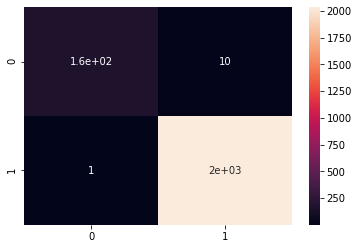

In [64]:
sns.heatmap(cm , annot=True)

In [57]:
print(classification_report(y_train , y_predict))

              precision    recall  f1-score   support

           0       0.99      0.94      0.97       171
           1       1.00      1.00      1.00      2034

    accuracy                           1.00      2205
   macro avg       0.99      0.97      0.98      2205
weighted avg       1.00      1.00      0.99      2205



In [65]:
y_predict_test= random.predict(x_test)
cm=confusion_matrix(y_test , y_predict_test)

<AxesSubplot:>

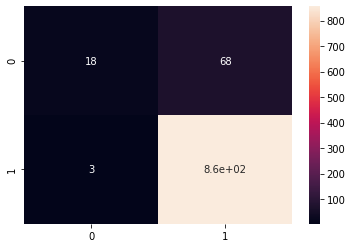

In [66]:
sns.heatmap(cm, annot=True )

In [68]:
print(classification_report(y_test , y_predict_test))

              precision    recall  f1-score   support

           0       0.86      0.21      0.34        86
           1       0.93      1.00      0.96       859

    accuracy                           0.92       945
   macro avg       0.89      0.60      0.65       945
weighted avg       0.92      0.92      0.90       945



### improve the model

In [70]:
df = pd.read_csv("minoo/amazon_alexa.tsv", sep='\t')

In [71]:
df=pd.concat([df ,pd.DataFrame(alexa.toarray())] , axis=1)

In [72]:
df

,rating,date,variation,verified_reviews,feedback,0,1,2,3,4,...,4034,4035,4036,4037,4038,4039,4040,4041,4042,4043
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,5,31-Jul-18,Charcoal Fabric,Music,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [73]:
df['lengh']=df['verified_reviews'].apply(len)

In [74]:
df

,rating,date,variation,verified_reviews,feedback,0,1,2,3,4,...,4035,4036,4037,4038,4039,4040,4041,4042,4043,lengh
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,195
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,172
4,5,31-Jul-18,Charcoal Fabric,Music,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,50
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,135
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,441
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,380


In [77]:
x=df.drop(['rating','date' ,'variation','verified_reviews','feedback'] , axis=1)

In [78]:
y=df['feedback']

<AxesSubplot:>

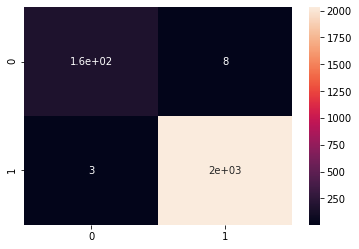

In [79]:
from sklearn.metrics import classification_report ,confusion_matrix
from sklearn.ensemble import RandomForestClassifier
random = RandomForestClassifier(n_estimators=100 , criterion='entropy')
random.fit(x_train , y_train)
y_predict= random.predict(x_train)
cm=confusion_matrix(y_train , y_predict)
sns.heatmap(cm, annot=True )

In [80]:
print(classification_report(y_test , y_predict_test))

              precision    recall  f1-score   support

           0       0.86      0.21      0.34        86
           1       0.93      1.00      0.96       859

    accuracy                           0.92       945
   macro avg       0.89      0.60      0.65       945
weighted avg       0.92      0.92      0.90       945



# naive bayes classification

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
email= pd.read_csv('minoo/emails.csv')
email

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
...,...,...
5723,Subject: re : research and development charges...,0
5724,"Subject: re : receipts from visit jim , than...",0
5725,Subject: re : enron case study update wow ! a...,0
5726,"Subject: re : interest david , please , call...",0


In [4]:
email.describe()

,spam
count,5728.000000
mean,0.238827
std,0.426404
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [5]:
email.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5728 entries, 0 to 5727
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5728 non-null   object
 1   spam    5728 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 89.6+ KB


In [6]:
ham= email[  email['spam'] == 0]
ham

,text,spam
1368,"Subject: hello guys , i ' m "" bugging you "" f...",0
1369,Subject: sacramento weather station fyi - - ...,0
1370,Subject: from the enron india newsdesk - jan 1...,0
1371,Subject: re : powerisk 2001 - your invitation ...,0
1372,Subject: re : resco database and customer capt...,0
...,...,...
5723,Subject: re : research and development charges...,0
5724,"Subject: re : receipts from visit jim , than...",0
5725,Subject: re : enron case study update wow ! a...,0
5726,"Subject: re : interest david , please , call...",0


In [7]:
spam = email[  email['spam'] == 1]
spam

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
...,...,...
1363,Subject: are you ready to get it ? hello ! v...,1
1364,Subject: would you like a $ 250 gas card ? do...,1
1365,"Subject: immediate reply needed dear sir , i...",1
1366,Subject: wanna see me get fisted ? fist bang...,1


In [8]:
print('spam percentage=' , (len(spam)/len(email) *100) ,'%')

spam percentage= 23.88268156424581 %


In [9]:
print('spam percentage=' , (len(ham)/len(email) *100) ,'%')

spam percentage= 76.11731843575419 %


c:\users\user\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='spam', ylabel='count'>

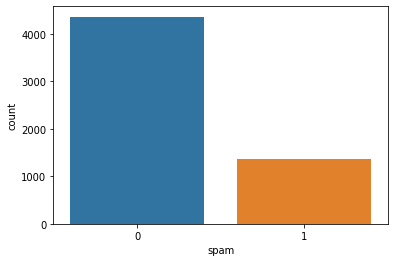

In [10]:
sns.countplot(email['spam'] , label='count')

### count vectorizer example¶

In [11]:
from sklearn.feature_extraction.text import CountVectorizer

sample=['this is the first document' ,'my document is second document', 'this document is the first document']

vectirizer= CountVectorizer()

In [12]:
x=vectirizer.fit_transform(sample)

In [13]:
print(x.toarray())

[[1 1 1 0 0 1 1]
 [2 0 1 1 1 0 0]
 [2 1 1 0 0 1 1]]


In [14]:
print(vectirizer.get_feature_names())

['document', 'first', 'is', 'my', 'second', 'the', 'this']


### apply

In [15]:
from sklearn.feature_extraction.text import CountVectorizer
spam_vectorizer=CountVectorizer()
x=vectirizer.fit_transform(email['text'])

In [16]:
print(x.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [4 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [17]:
y=email['spam'].values

In [18]:
from sklearn.naive_bayes import MultinomialNB

CLASSIFIER=MultinomialNB()
CLASSIFIER.fit(x,y)

MultinomialNB()

In [19]:
testing_sample=['free money!!!','hi,i am in way ','thank you , i am so soory for being late']
testing_vectorizer=vectirizer.transform(testing_sample)

In [20]:
test_predict=CLASSIFIER.predict(testing_vectorizer)
test_predict

array([1, 0, 0], dtype=int64)

### train & test

In [22]:
x.shape

(5728, 37303)

In [23]:
y.shape

(5728,)

In [25]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x, y, test_size=0.2)

In [27]:
from sklearn.naive_bayes import MultinomialNB
classifier=MultinomialNB()
classifier.fit(x_train, y_train)

MultinomialNB()

In [28]:
from sklearn.metrics import classification_report ,confusion_matrix

In [30]:
y_predict=classifier.predict(x_train)
y_predict

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [31]:
cm=confusion_matrix(y_train , y_predict)

<AxesSubplot:>

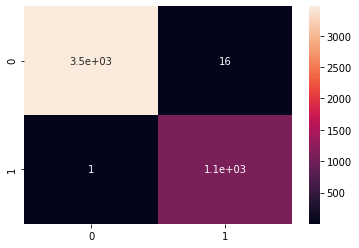

In [33]:
sns.heatmap(cm , annot=True)

In [34]:
from sklearn.metrics import accuracy_score
accuracy_score(y_train, y_predict)

0.99628982976866

In [35]:
y_predict_test=classifier.predict(x_test)
cm=confusion_matrix(y_test , y_predict_test )

<AxesSubplot:>

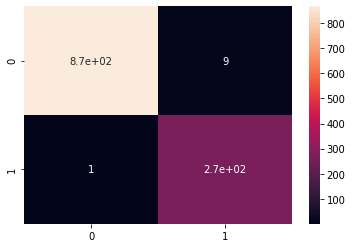

In [36]:
sns.heatmap(cm , annot=True)

In [37]:
from sklearn.metrics import accuracy_score
accuracy_score(y_train, y_predict)

0.99628982976866